In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [2]:
# Import Dataset
salary_train = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\12 Naive Buyes\SalaryData_Train.csv")

In [3]:
salary_test = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\12 Naive Buyes\SalaryData_Test.csv")

# EDA

In [4]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


Both Dataset Columns are same

In [8]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [9]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# Check null Values
salary_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
salary_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:>

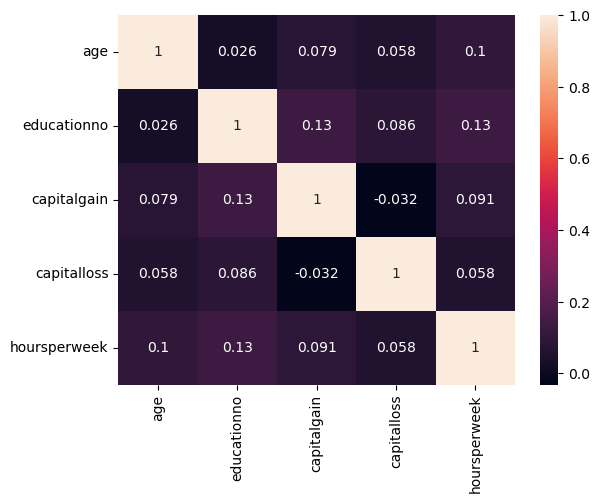

In [12]:
# Correlation Between Columns
sns.heatmap(salary_test.corr(), annot=True)

<AxesSubplot:>

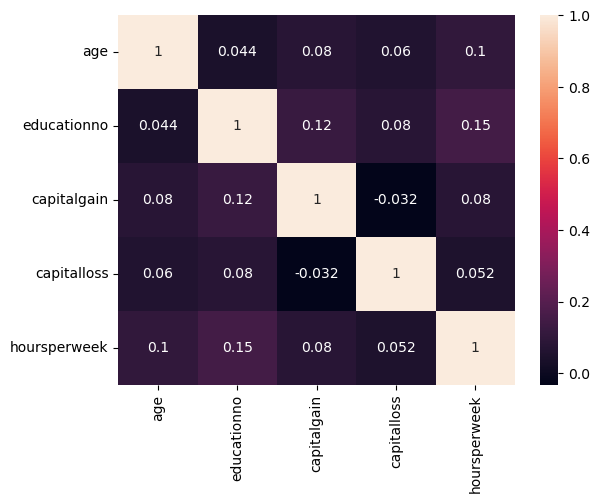

In [13]:
sns.heatmap(salary_train.corr(), annot=True)

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

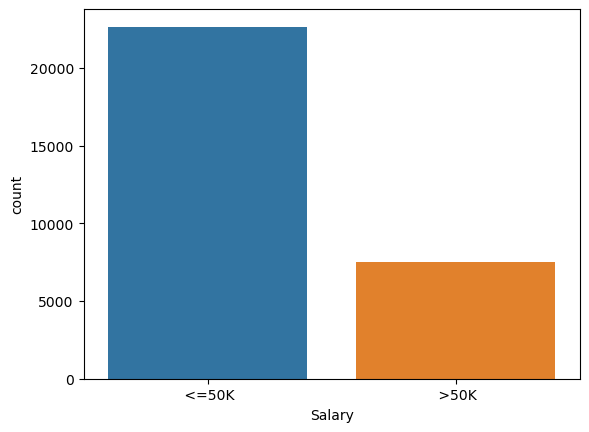

In [14]:
# Count of Less than and More than 50K
sns.countplot(salary_train['Salary'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

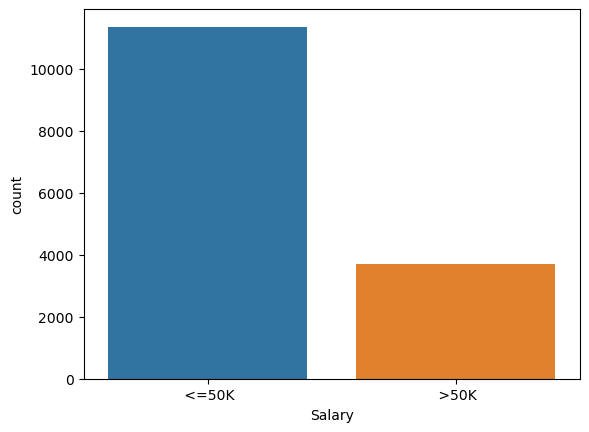

In [15]:
sns.countplot(salary_test['Salary'])

<Figure size 1500x1000 with 0 Axes>

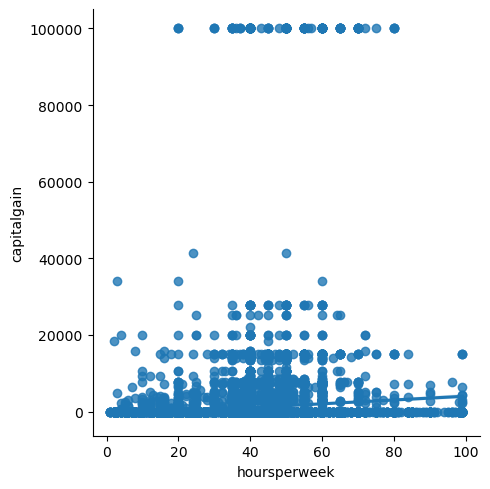

In [16]:
# Correlate Between CapitalGain and Hours Per Week
plt.figure(figsize=(15,10))
sns.lmplot(y='capitalgain', x='hoursperweek',data=salary_train)
plt.show()

<Figure size 1500x1000 with 0 Axes>

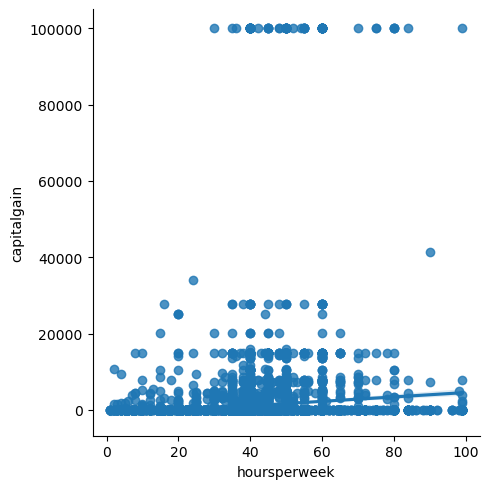

In [17]:
plt.figure(figsize=(15,10))
sns.lmplot(y='capitalgain', x='hoursperweek',data=salary_test)
plt.show()

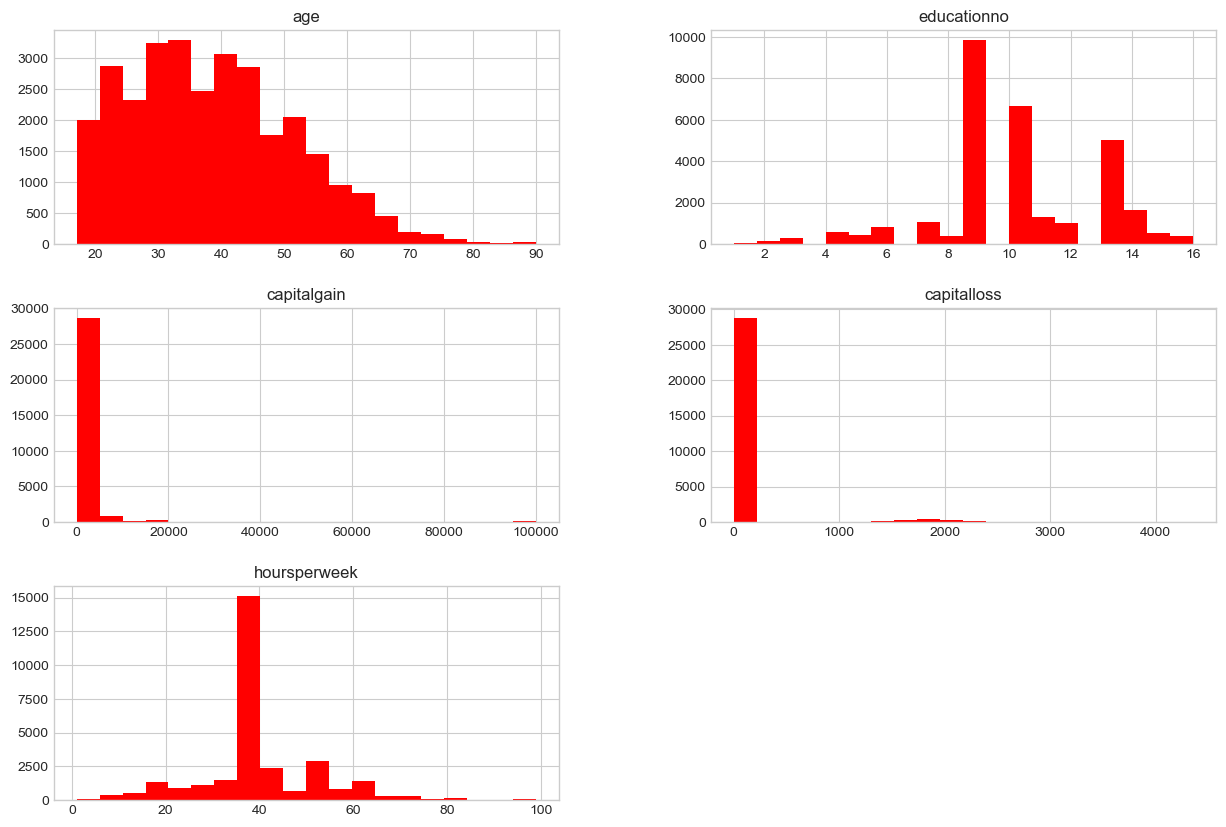

In [18]:
# Numerical Data Visulization
plt.style.use('seaborn-whitegrid')
salary_train.hist(bins=20, figsize=(15,10), color='red')
plt.show()

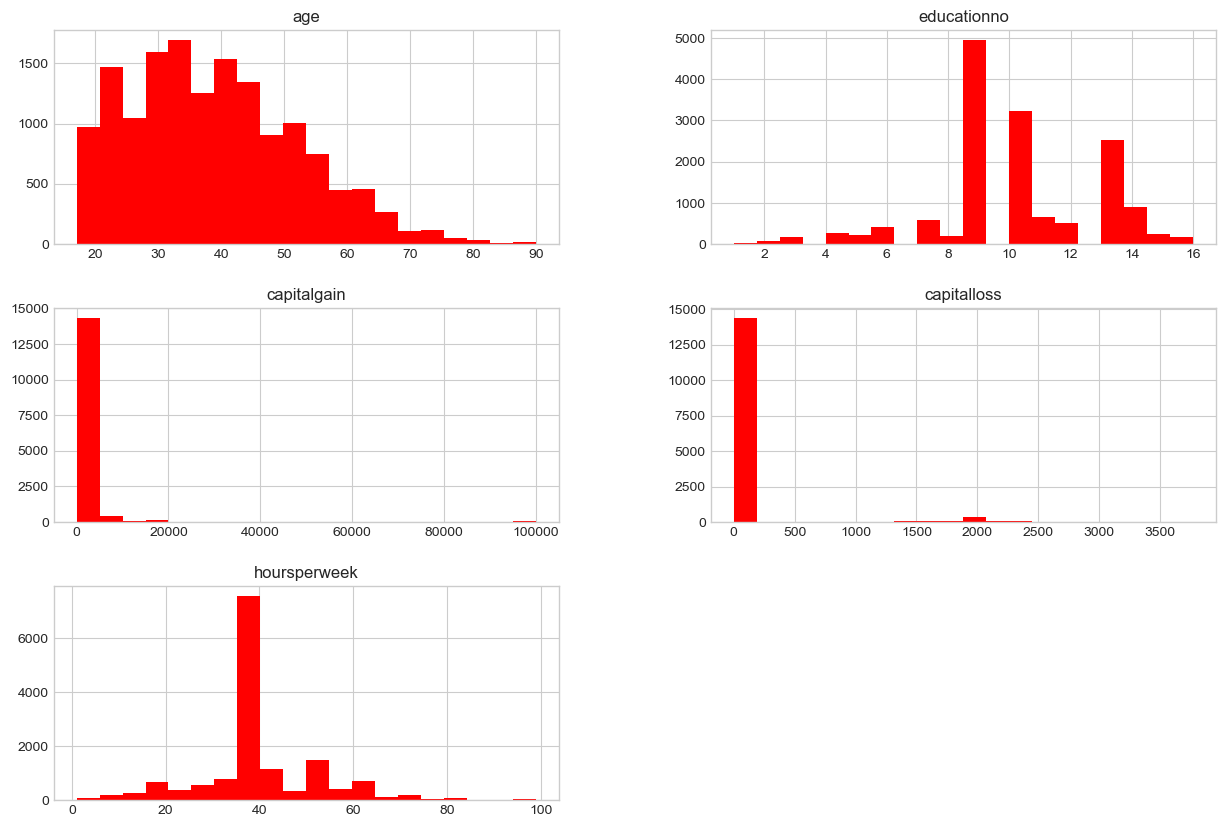

In [19]:
plt.style.use('seaborn-whitegrid')

salary_test.hist(bins=20, figsize=(15,10), color='red')
plt.show()

# Preprocessing

In [20]:
# Categorical Data Convert into Numerical using Label Encoding
label_encoder = preprocessing.LabelEncoder()

In [21]:
# Categorical Column list
string_columns = {'workclass','education','maritalstatus','occupation','relationship','race','sex','native'}

In [22]:
# Transform Columns in Numerical Form
for i in string_columns:
    salary_train[i]=label_encoder.fit_transform(salary_train[i])
    salary_test[i]=label_encoder.fit_transform(salary_test[i])

In [23]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [24]:
# Split a Independent and Dependent Data
train_X = salary_train.iloc[:,0:13]
train_y = salary_train.iloc[:,[13]]

In [25]:
# Dataframe Change to array
X_train = np.array(train_X)
y_train = np.array(train_y)

In [26]:
test_X = salary_test.iloc[:,0:13]
test_y = salary_test.iloc[:,[13]]

In [27]:
X_test = np.array(test_X)
y_test = np.array(test_y)

# Naive Bayes Using Gaussian NB

In [28]:
# Naive Bayes Model Building Use a Gaussian NB
model = GaussianNB()
model.fit(X_train , y_train)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [29]:
# Predict the test Data using Train Model
y_pred = model.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [30]:
y_test

array([[' <=50K'],
       [' <=50K'],
       [' >50K'],
       ...,
       [' <=50K'],
       [' <=50K'],
       [' >50K']], dtype=object)

In [31]:
# Check Confusion Matrix and Accuracy Score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[10759   601]
 [ 2491  1209]]
0.7946879150066402


In [32]:
# Check train data 
y_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
acc = accuracy_score(y_train, y_pred)
print(cm)
print(acc)

[[21505  1148]
 [ 5025  2483]]
0.7953317197705646


# Naive Bayes using Multinomail NB

In [33]:
# Naive Bayes Model Building Use a Multinomial NB
model = MultinomialNB()
model.fit(X_train , y_train)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [34]:
# Predict the test Data using Train Model
y_pred = model.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [35]:
y_test

array([[' <=50K'],
       [' <=50K'],
       [' >50K'],
       ...,
       [' <=50K'],
       [' <=50K'],
       [' >50K']], dtype=object)

In [36]:
# Check Confusion Matrix and Accuracy Score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[10891   469]
 [ 2920   780]]
0.7749667994687915


In [37]:
# Check train data 
y_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
acc = accuracy_score(y_train, y_pred)
print(cm)
print(acc)

[[21717   936]
 [ 5913  1595]]
0.7729186698053778
